#### **Project Overview**

* Grouped customers into clusters based on shared characteristics between them using unsupervised learning (K-Means clustering).
* Cleaned, explored and manipulated the entire data extensively on Python to make it usable for our use case.
* Engineered new features as and when necessary in accordance with our clustering requirements.
* Was able to extract meaningful insights from the data for each cluster that can help make efficient yet effective business decisions.
* Used K-Means clustering with optimal number of clusters that we were able to derive using elbow method.
* Used visualizations extensively to explore and visually interpret the data.

#### **Potential Uses**

* Can help formulate better marketing strategies.
* Can help the business save money by making better and effective use of the marketing budgets.
* Can help the company gain a competitive edge over rival businesses.
* Can help to procure and develop better products by having a better understanding of the customer's needs and wants.

##### **Project Introduction**

In this project I'll be divding and grouping all individual customers of a grocery business into clusters based on shared common characteristics. This will be extremely beneficial to the business to understand their customer's needs and wants and cater services in a more personalized manner.

In [147]:
# importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [148]:
# set the figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})

In [149]:
# importing the dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [150]:
# we run the describe method to generate the descriptive statistics for all the numerical features
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### **Data Cleaning**

We see that the features **"Z_CostContact"** and **"Z_Revenue"** doesn't signify any meaning so we will be dropping them.

In [151]:
df.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True) # dropped the useless columns

In [152]:
# we check for null values
for i in df.columns:
    if df[i].isna().sum() != 0:
        print("Feature Name:", i, "\nNaN Count:", df[i].isna().sum())

Feature Name: Income 
NaN Count: 24


Since there are only 24 observations with null values in "**Income**", we will be dropping the observations altogether and not try to impute.

In [153]:
df.dropna(inplace=True) # dropped rows with the null values

In [154]:
df["ID"].nunique(), len(df)

(2216, 2216)

We see that all the customers are unique and there are no different entries of the same customer.

In [155]:
# we check for the data types
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

We see that "**Dt_Customer**" is in object data type so will convert it to date time.

In [156]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

We will create a new feature to indicate the number of days a person has been a customer to the business.

In [157]:
# we run simple For-Loops to subtract the registration date of each customer from the max date to find the days a customer has been registered with the business
datelist = []
for i in df["Dt_Customer"]:
    datelist.append(i.date())

duration_list = []
for i in df["Dt_Customer"]:
    duration_list.append(max(datelist) - i.date())
    
df["dayscustomerfor"] = duration_list

In [158]:
# we extract the number of days and store it back to the feature
df["dayscustomerfor"] = df["dayscustomerfor"].apply(lambda x: int(str(x).split(" ")[0]))

In [159]:
# we check the stats of our new feature
df["dayscustomerfor"].describe()

count    2216.000000
mean      353.521209
std       202.434667
min         0.000000
25%       180.000000
50%       355.500000
75%       529.000000
max       699.000000
Name: dayscustomerfor, dtype: float64

We will create a new feature based on "**dayscustomerfor**" and categorise on the basis of if the customer is a new or an old customer. Anyone who registered in the last 30% of the days will be a new customer and rest all will be old customer.

In [160]:
# we create masks with quantile method to filter out data and categorise them
masknew = df["dayscustomerfor"] <= df["dayscustomerfor"].quantile(0.3)
maskold = df["dayscustomerfor"] > df["dayscustomerfor"].quantile(0.3)
df.loc[masknew, "Cust_Seniority"] = "New"
df.loc[maskold, "Cust_Seniority"] = "Old"
df["Cust_Seniority"].value_counts() # we display the New and Old value counts

Old    1550
New     666
Name: Cust_Seniority, dtype: int64

We will be deriving the age of all our customers using their year of birth.

In [161]:
# we check for the max year of our date list
max(datelist)

datetime.date(2014, 6, 29)

We see that max year we have available is from 2014 so we will be finding the age of customers on 2014.

In [162]:
# created new feature age
df["Age"] = 2014 - df["Year_Birth"]

We check the different types of values and their counts in our feature "**Education**".

In [163]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

We will be simplifying the categories by further categorising them as Undergraduate, Graduate or Post-Graduate.

In [164]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}) # simplified

We check the different types of values and their counts in our feature "**Marital_Status**".

In [165]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We see that we can simplify further by categorising on the basis of if the customers are couple or not couple.

In [166]:
# created new feature "Couple", 1 if yes, 0 if no
df["Couple"] = df["Marital_Status"].apply(lambda x: 1 if (x == "Married" or x == "Together") else 0)

For "**Kidhome**" and "**Teenhome**" features, we can simplify by combining them together as number of children of the customer.

In [167]:
df["Children"] = df["Kidhome"] + df["Teenhome"] # combined Kidhome and Teenhome as number of children

We will create a new feature by combining all spends on products to get the total amount of money spent by the customer.

In [168]:
df["Total_spend"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [169]:
# we also rename the name of the items
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [170]:
# we check the stats of our new feature
df["Total_spend"].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total_spend, dtype: float64

We create a new feature by combining all the campaigns accepted by customer to find the total number of campaigns accepted.

In [171]:
df["Total_campaigns_accepted"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df["Response"]

In [172]:
# we drop all the redundant featues
to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'dayscustomerfor']
df.drop(to_drop, axis=1, inplace=True)

Next, we will check for outliers by plotting boxplots for all the numerical features with the help of a For-Loop.

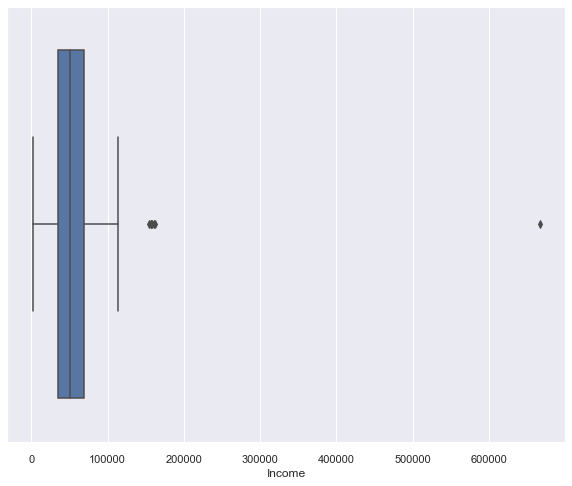

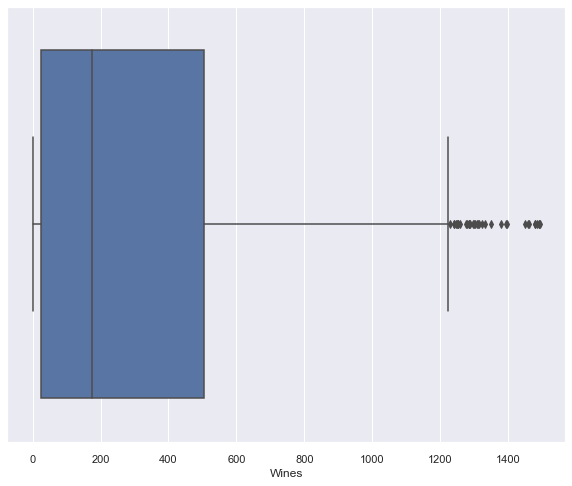

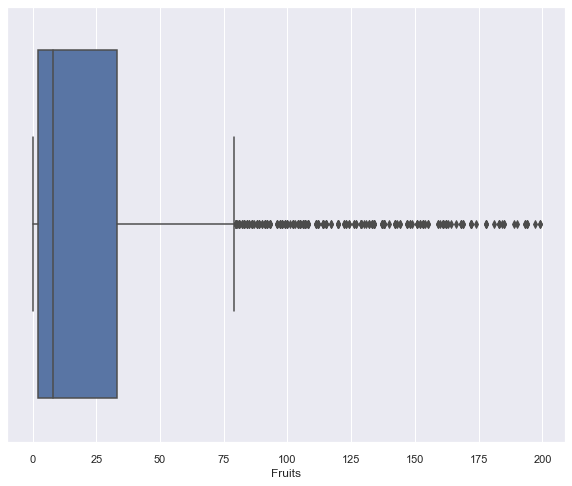

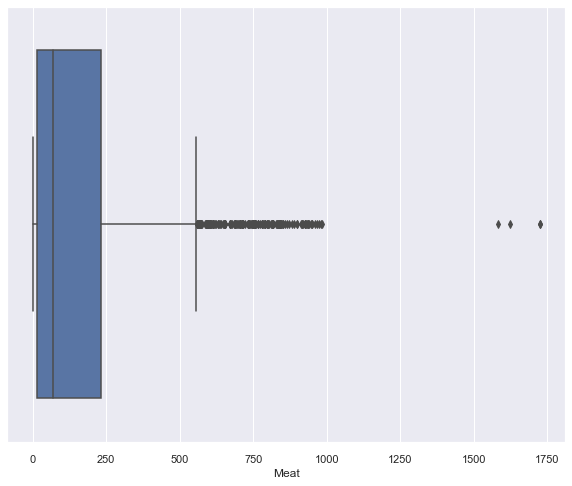

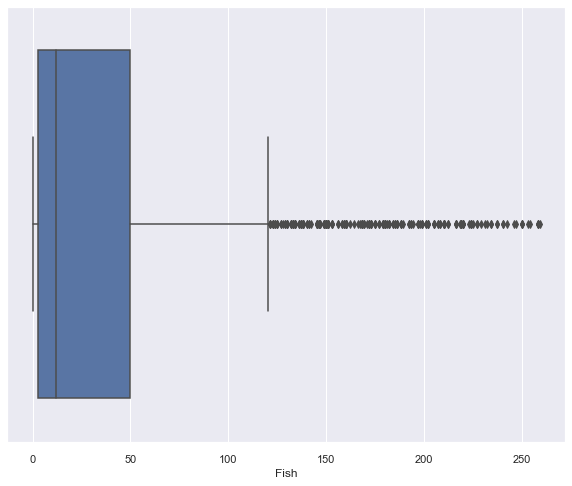

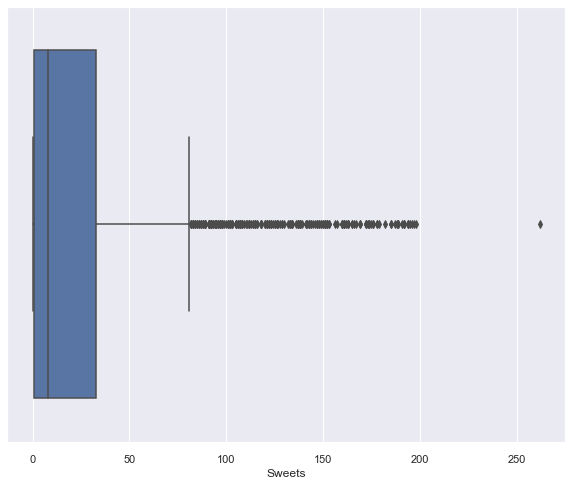

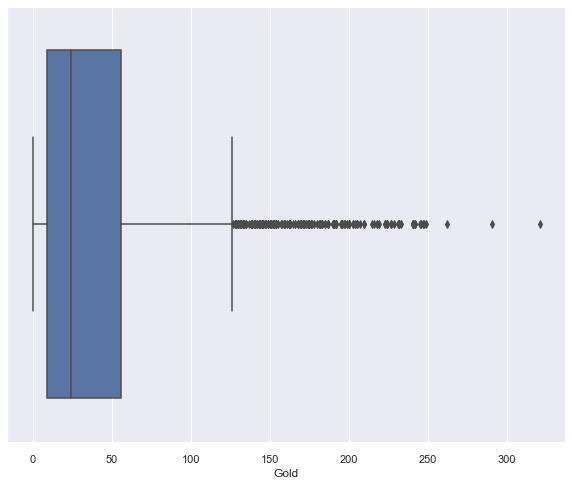

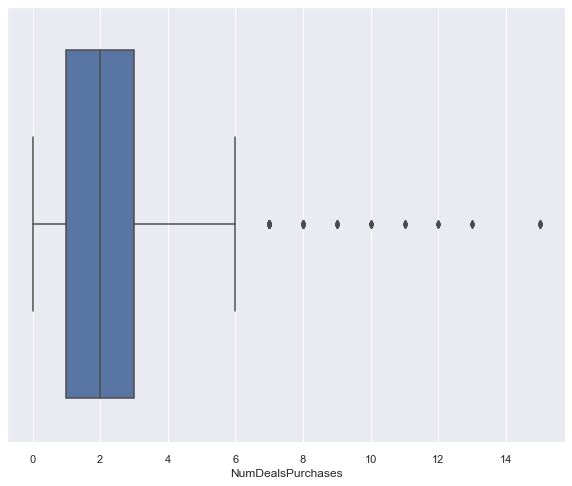

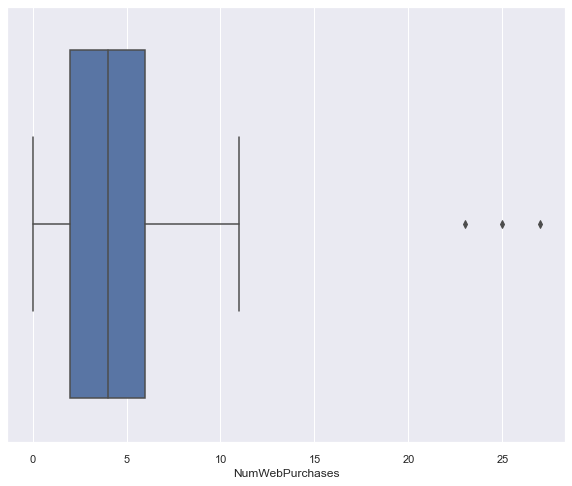

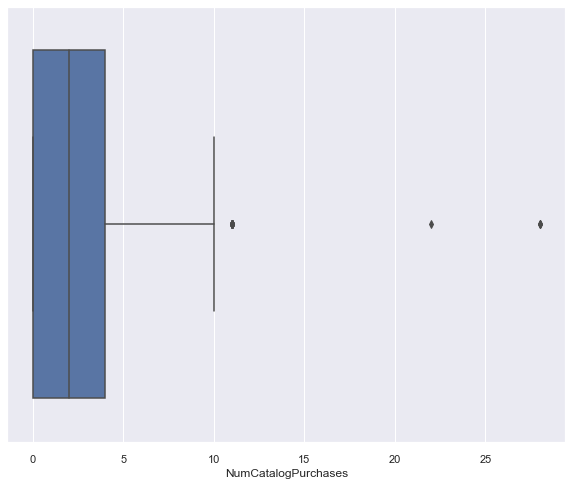

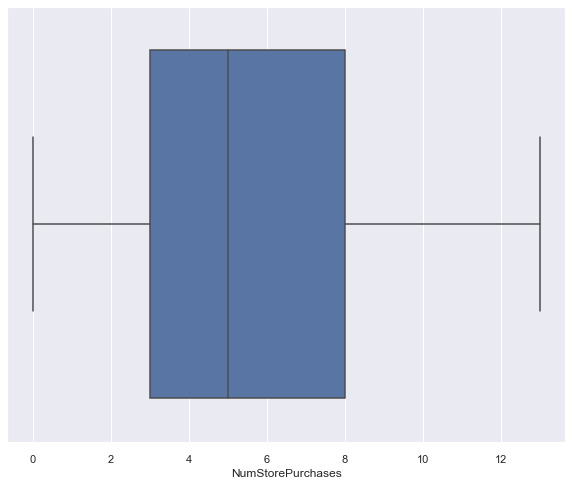

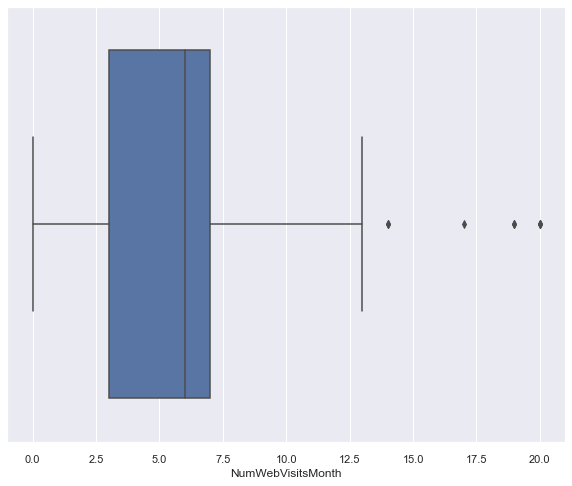

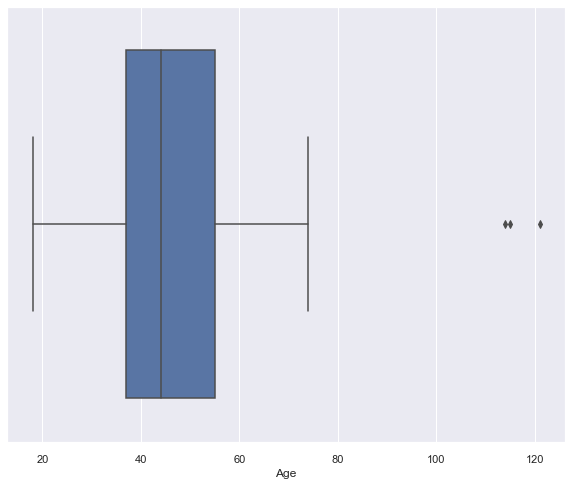

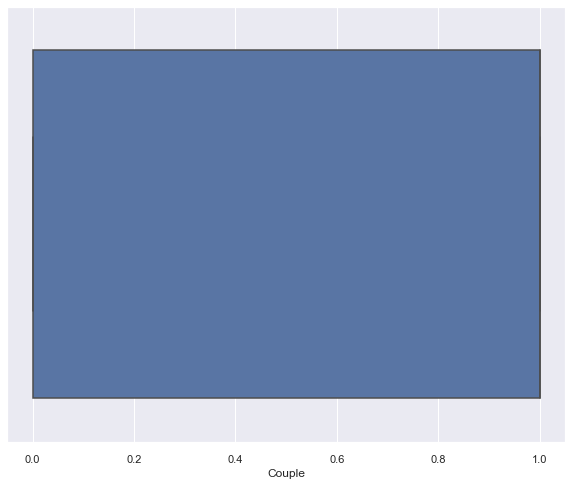

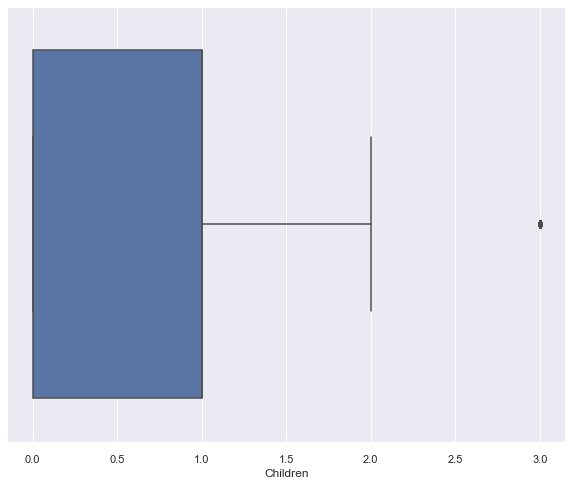

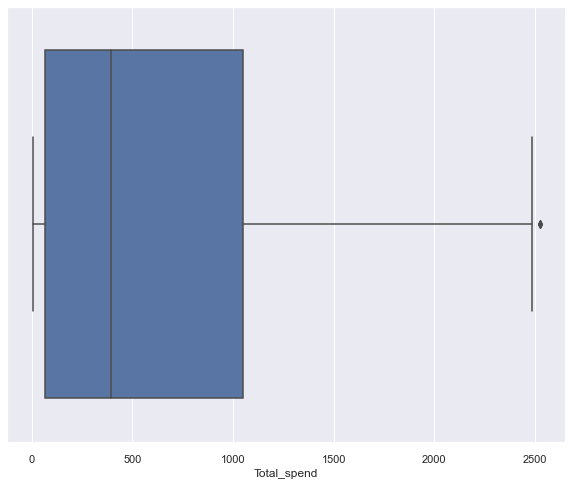

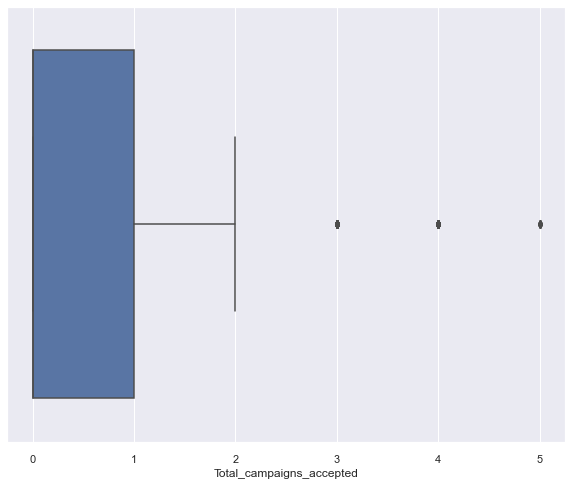

In [173]:
# box plot for all numerical features
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure(i)
        sns.boxplot(data=df, x=i)

We see that we have outliers in "**Income**" and "**Age**" features. We will try to explore them further to see if we can do anything.

In [174]:
df[df["Income"] > 600000] # income outlier

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
2233,Graduate,666666.0,9,14,18,8,1,12,4,3,1,3,6,Old,37,1,1,62,0


In [175]:
df[df["Age"] > 100] # age outlier

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
192,Undergraduate,36640.0,15,6,8,7,4,25,1,2,1,2,5,Old,114,0,1,65,0
239,Undergraduate,60182.0,8,0,5,7,0,2,1,1,0,2,4,New,121,0,1,22,0
339,Postgraduate,83532.0,755,144,562,104,64,224,1,4,6,4,1,Old,115,1,0,1853,1


Since there are only 4 observations in total with the outliers, we will just drop them and proceed ahead.

In [176]:
# filtered out the outliers
df = df[df["Income"] < 600000]
df = df[df["Age"] < 100]

As the data is cleaned, we try to see some interesting points of interest before proceeding for data pre-processing.

In [177]:
# we do a groupby with education and check the income stats
df.groupby("Education")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1115.0,52169.75,21354.32,1730.0,34831.0,51983.0,69915.5,157146.0
Postgraduate,845.0,54718.66,20456.55,4023.0,38829.0,54108.0,68352.0,162397.0
Undergraduate,252.0,41771.25,22828.77,7500.0,23551.5,35916.5,60330.5,96547.0


We see that Postgraduates have the highest average income followed by Graduates whereas Undergraduates have the lowest average income in comparison. 

* *Does it mean the business can target Graduates and Postgraduates with campaigns as they have more income to spend on purchases?*

**Lets find out if people with higher income actually spend more on purchases?**

In [178]:
# we do a groupby with education and check the total spend stats
df.groupby("Education")["Total_spend"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1115.0,622.19,600.19,5.0,70.50,415.0,1077.5,2524.0
Postgraduate,845.0,646.42,620.12,8.0,86.00,426.0,1092.0,2525.0
Undergraduate,252.0,409.98,510.59,13.0,50.75,98.0,729.0,2257.0


**It looks like customers with higher income indeed like to spend more on purchases !!**

In [179]:
# we do a groupby with total campaigns accepted and check the income stats
df.groupby("Total_campaigns_accepted")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Total_campaigns_accepted,,,,,,,,
0,1608.0,48292.85,20404.27,1730.0,33181.75,46927.0,63793.00,162397.0
1,368.0,56750.80,20356.12,5648.0,40579.50,58532.0,73741.25,98777.0
2,139.0,61659.04,21751.93,7500.0,46015.00,68117.0,78628.00,96843.0
3,51.0,78462.35,13516.53,37929.0,75519.00,81929.0,85471.50,105471.0
4,36.0,82143.28,11521.92,48192.0,75742.50,82171.5,90253.50,102160.0
5,10.0,86434.40,9316.60,65169.0,84561.25,86727.0,90321.75,102692.0


Its interesting to see that customers with higher average income have accepted more number of campaigns.

* **Does it mean customers with higher average income were specifically targetted with campaigns by the business in the past prior to our investigation?**

#### **Data Pre-Processing**

The first step of our Data Pre-Processing will be to label encode all our categorical features.

In [180]:
# a simple For-Loop to detect all categorical features
for i in df.columns:
    if df[i].dtypes == "object":
        print(i)

Education
Cust_Seniority


In [181]:
# we check the value names and counts of "Education"
df["Education"].value_counts()

Graduate         1115
Postgraduate      845
Undergraduate     252
Name: Education, dtype: int64

In [182]:
df["Education"] = df["Education"].replace({"Undergraduate":0, "Graduate":1, "Postgraduate":2}) # label encoded manually

In [183]:
# we check the value names and counts of "Cust_Seniority"
df["Cust_Seniority"].value_counts()

Old    1547
New     665
Name: Cust_Seniority, dtype: int64

In [184]:
df["Cust_Seniority"] = df["Cust_Seniority"].replace({"Old":0, "New":1}) # label encoded manually

The next step will be to scale our data.

In [185]:
# scaled our data using standard scaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
0,-0.411675,0.287105,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.655640,1.018352,-1.349603,-1.264598,1.676245,0.617244
1,-0.411675,-0.260882,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.525226,1.274785,-1.349603,1.404572,-0.963297,-0.502808
2,-0.411675,0.913196,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.655640,0.334530,0.740959,-1.264598,0.280110,-0.502808
3,-0.411675,-1.176114,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,1.525226,-1.289547,0.740959,0.069987,-0.920135,-0.502808
4,1.123949,0.294307,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,1.525226,-1.033114,0.740959,0.069987,-0.307562,-0.502808


We will have a look at the correlation matrix to understand the correlation amongst all our features before proceeding towards clustering.

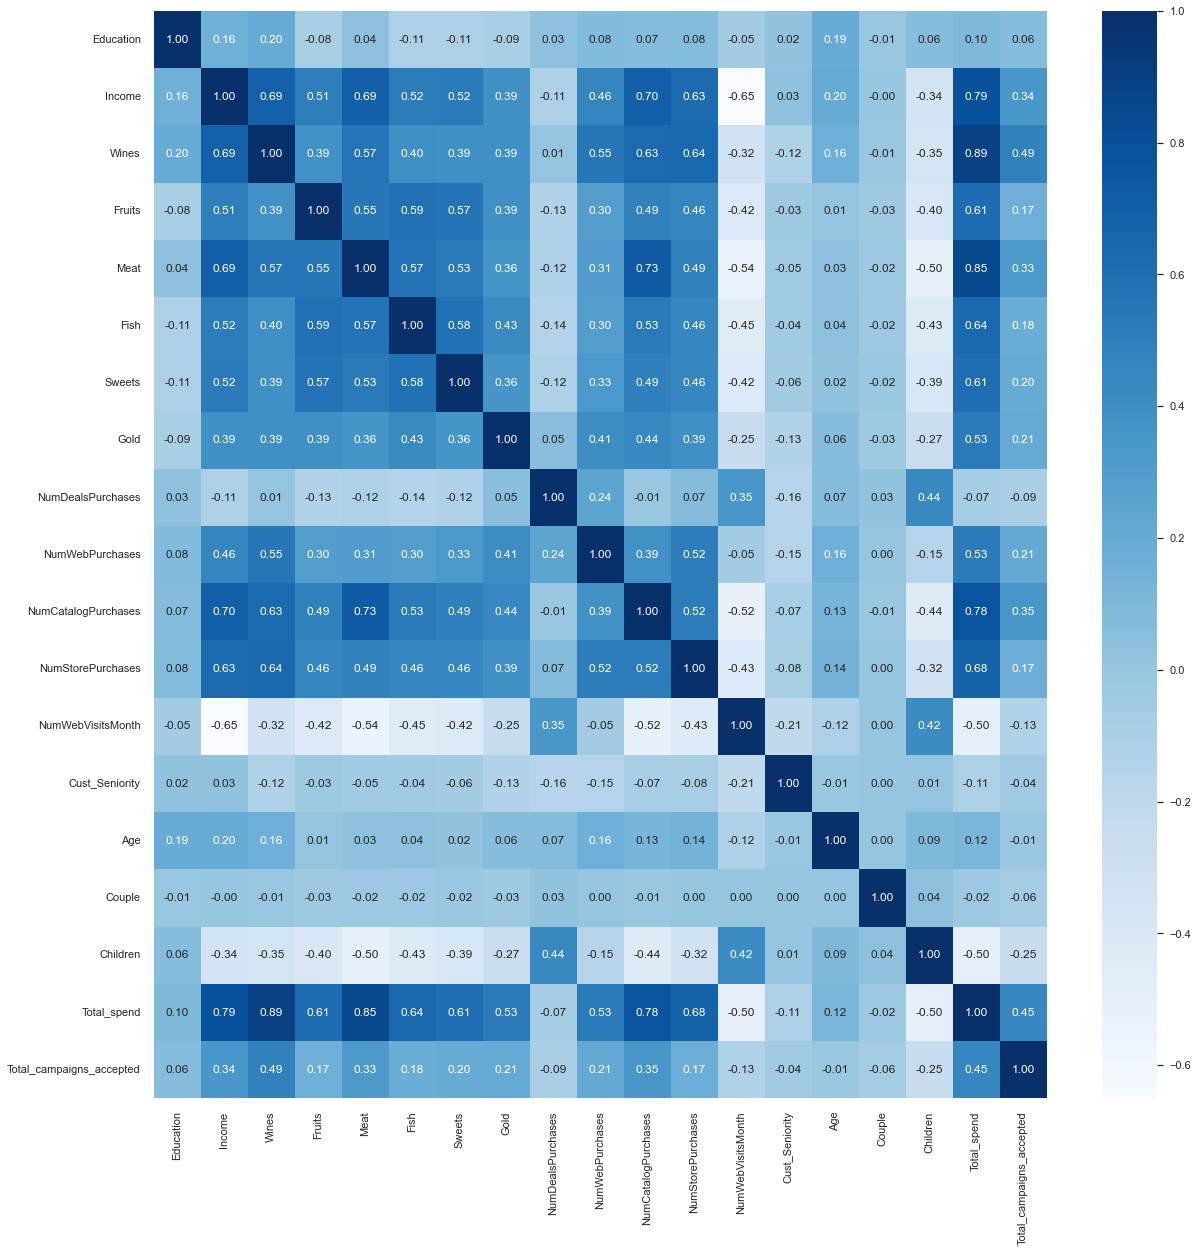

In [186]:
# we plot the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

We see that everything looks so far so good so we proceed towards clustering.

#### **Clustering**

We select the features we want to keep for clustering and find the optimal number of clusters using elbow method.

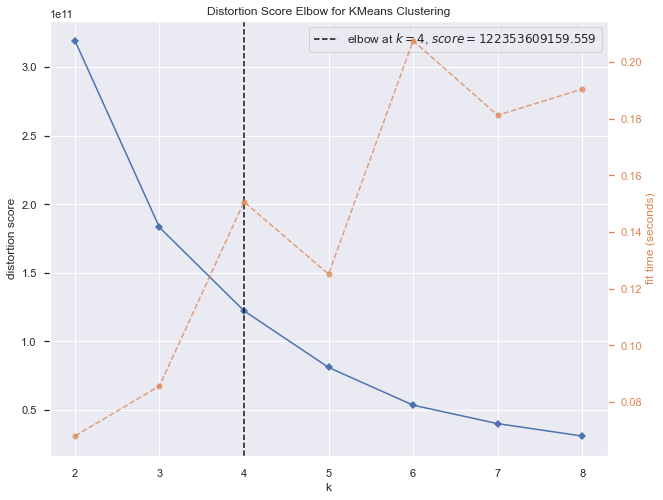

In [187]:
# elbow method plot
to_keep = ['Education', 'Income', 'Cust_Seniority', 'Age',
       'Couple', 'Children', 'Total_spend']

elbow = KElbowVisualizer(KMeans(), k=8)
elbow.fit(df[to_keep])
elbow.show()
plt.show()

We see that the optimal number of clusters is 4 for our use case.

In [188]:
# we fit and predict the clusters and add the cluster numbers back to our dataframe
kmeancluster = KMeans(n_clusters=4)
df["kcluster"] = kmeancluster.fit_predict(df[to_keep])

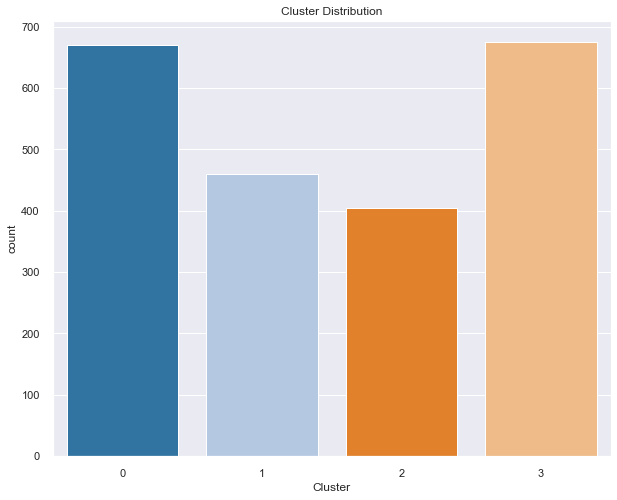

In [190]:
# we check the cluster counts
sns.countplot(data=df, x="kcluster", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.show()

#### **Data Exploration**

We plot "**Income**" and "**Total_spend**" along with cluster info on a scatter plot and try to interpret the relationship visually.

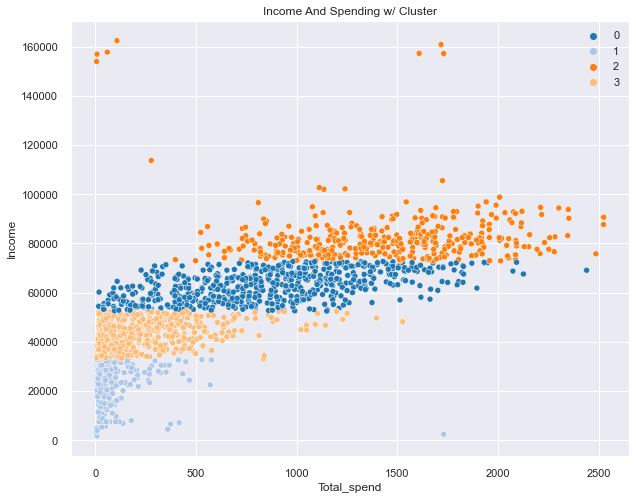

In [192]:
pl = sns.scatterplot(data = df,x=df["Total_spend"], y=df["Income"],hue=df["kcluster"], palette="tab20")
pl.set_title("Income And Spending w/ Cluster")
plt.legend()
plt.show()

We see that:
* Cluster 0: Average Income and Average Spending
* Cluster 1: Low Income and Low Spending
* Cluster 2: High Income and High Spending
* Cluster 3: Below Average Income and Below Average Spending

We try to interpret the relationship of income with clusters.

In [193]:
# we check the descriptive stats of income for each clusters
df.groupby("kcluster")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,62825.14,5849.88,52513.0,57737.5,62972.0,67642.50,72679.0
1,460.0,23381.95,6826.90,1730.0,19397.0,24457.0,28729.50,32765.0
2,405.0,82717.04,11779.96,72828.0,76773.0,80360.0,84618.00,162397.0
3,676.0,42191.01,5671.20,32871.0,37215.0,42057.0,46894.25,52413.0


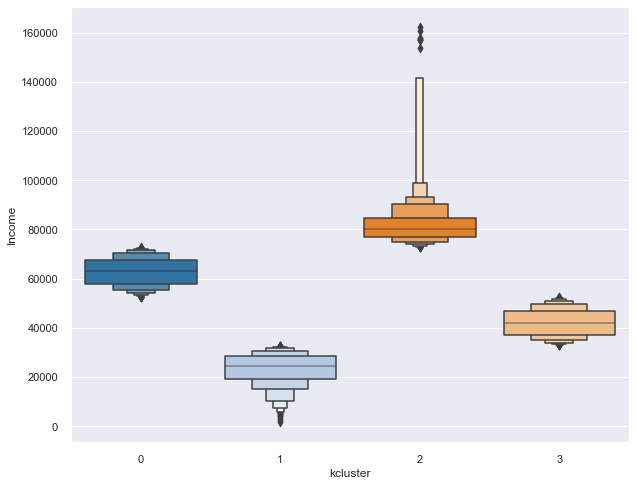

In [194]:
# we plot boxenplot
sns.boxenplot(x=df["kcluster"], y=df["Income"], palette="tab20")
plt.show()

We can clearly interpret that Cluster 2 is our highest income group followed by Cluster 0 and then Cluster 3 and 1.

Next, we try to interpret the relationship of total spending with clusters.

In [195]:
# we check the descriptive stats of total spending for each clusters
df.groupby("kcluster")["Total_spend"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,866.67,445.26,16.0,528.5,871.0,1168.50,2440.0
1,460.0,76.09,111.92,5.0,31.0,50.0,77.25,1730.0
2,405.0,1420.05,458.80,6.0,1104.0,1428.0,1734.00,2525.0
3,676.0,224.29,235.34,8.0,55.0,133.5,319.00,1526.0


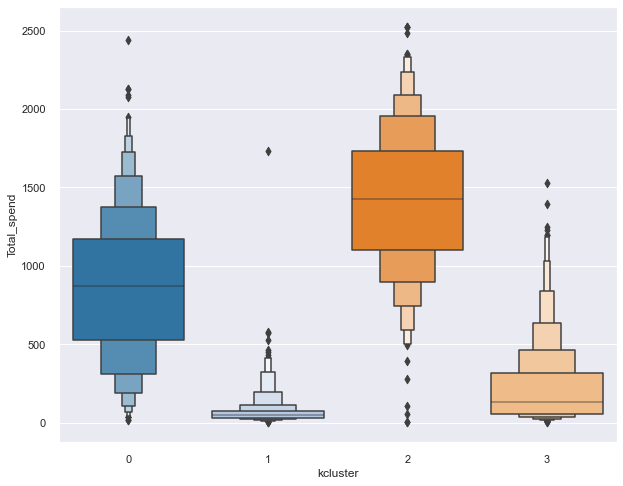

In [196]:
# we plot boxenplot
sns.boxenplot(x=df["kcluster"], y=df["Total_spend"], palette="tab20")
plt.show()

We can clearly interpret that Cluster 2 is our highest spending group followed by Cluster 0 and then Cluster 3 and 1.

**From above we can conclude that Cluster 2 groups our best customers, they have the highest income and also the highest spending. Cluster 0 is also good in this regard and trails just behind Cluster 2. Then we are followed by Cluster 3 and 1.**

Next, we will take a deeper look on spending by checking the information with all items that were sold.

In [197]:
# we check the mean of all items for their clusters
df.groupby("kcluster")[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].mean().round(2)

,Wines,Fruits,Meat,Fish,Sweets,Gold
kcluster,,,,,,
0,475.91,35.80,205.99,50.13,35.83,63.00
1,18.02,5.83,21.63,8.44,5.77,16.40
2,657.00,64.57,468.72,91.10,67.55,71.12
3,120.69,7.97,46.55,13.11,8.54,27.43


In [198]:
# we check the percent of total by clusters for all items
items = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
alplist = []
for i in items:
    i = pd.DataFrame({i:(df.groupby("kcluster")[i].sum() / df[i].sum() * 100).round(1)})
    alplist.append(i)
pd.concat(alplist, axis=1)

,Wines,Fruits,Meat,Fish,Sweets,Gold
kcluster,,,,,,
0,47.3,41.2,37.4,40.4,40.2,43.5
1,1.2,4.6,2.7,4.7,4.4,7.8
2,39.4,44.9,51.4,44.3,45.7,29.6
3,12.1,9.2,8.5,10.6,9.7,19.1


We can see that:
* Cluster 2 has the highest spending on Meat comparatively.
* Cluster 0 has a high spending on Wines comparatively.
* Cluster 3 has spent quite a lot on Gold comparatively.
* Cluster 1 has the least spending but they have shown some interest towards Gold comparatively.

We try to interpret the relationship of Age with clusters.

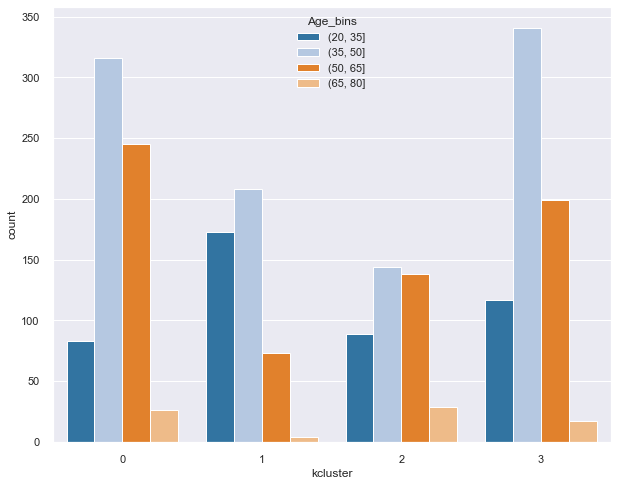

In [201]:
# we create bins of 15 for age and plot them with a countplot for each cluster
df["Age_bins"] = pd.cut(df["Age"], bins=[20,35,50,65,80])
sns.countplot(x=df["kcluster"], hue=df["Age_bins"], palette="tab20")
plt.show()

We can see that:
* Cluster 1 which groups our worst customers has the highest concentration of young customers (20-35 years).
* Cluster 2 which groups our best customers has a higher ratio of customers between 35 to 65 years.
* Cluster 3 has the highest ratio of 35 to 50 year olds.
* Cluster 0 has a high ratio of 50-65 year olds.

We try to interpret the relationship of Children with clusters.

In [202]:
# we check the descriptive stats
df.groupby("kcluster")["Children"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,0.92,0.68,0.0,0.0,1.0,1.0,3.0
1,460.0,0.99,0.64,0.0,1.0,1.0,1.0,3.0
2,405.0,0.31,0.59,0.0,0.0,0.0,1.0,3.0
3,676.0,1.33,0.70,0.0,1.0,1.0,2.0,3.0


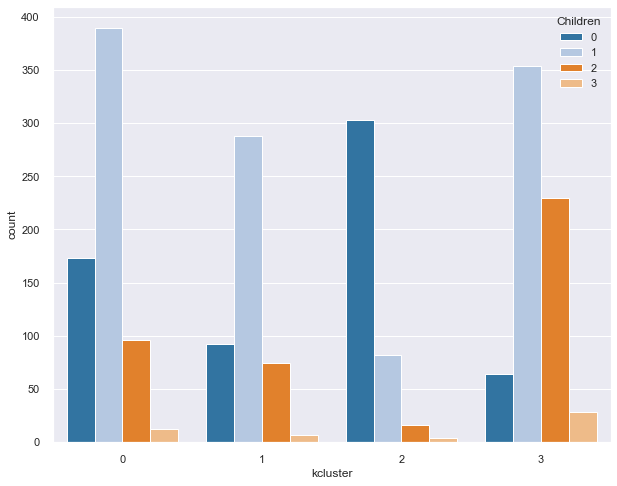

In [203]:
# we plot countplot of children for each cluster
sns.countplot(data=df, x="kcluster", hue="Children", palette="tab20")
plt.show()

We can see that:
* **Cluster 2 which group our best customers has the highest ratio of 0 children and it looks very significant comparatively.**
* Cluster 3 has a high ratio of 2 children.
* Cluster 0, 1 and 3 has a high ratio of at least 1 children.

We try to interpret the relationship of Education with clusters.

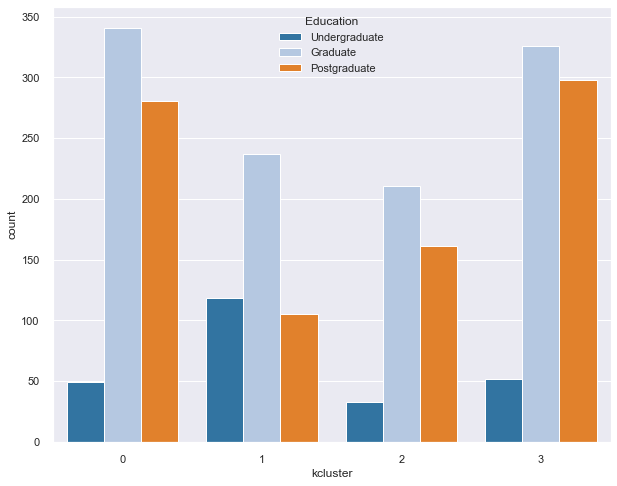

In [205]:
# we plot the countplot
sns.countplot(data=df, x="kcluster", hue="Education", palette="tab20")
plt.legend(title='Education', labels=['Undergraduate', 'Graduate', 'Postgraduate'])
plt.show()

We can see that:
* Cluster 1 has the highest ratio of Undergraduates comparatively.
* Cluster 3 and 0 both have a significantly higher ratio of Postgraduates.
* Cluster 2 majorly consists of Graduates and Postgraduates.

We try to interpret the relationship of number of deals purchased with discount with our clusters.

In [207]:
# we check the descriptive stats
df.groupby("kcluster")["NumDealsPurchases"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,2.80,2.16,0.0,1.0,2.0,4.0,15.0
1,460.0,2.03,1.64,0.0,1.0,2.0,3.0,15.0
2,405.0,1.28,1.42,0.0,1.0,1.0,1.0,15.0
3,676.0,2.67,1.84,1.0,1.0,2.0,4.0,13.0


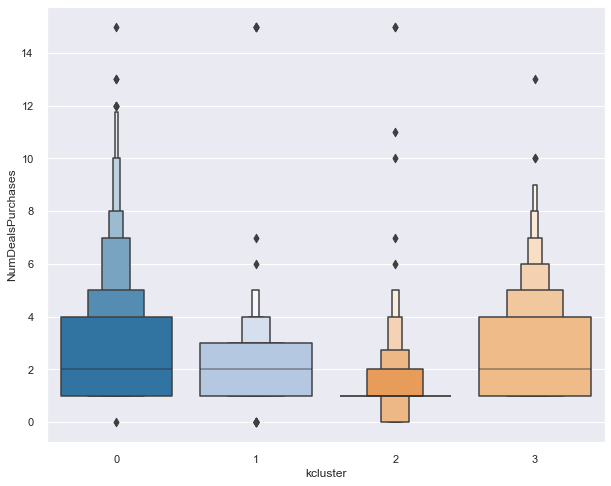

In [209]:
# we plot boxen plot
sns.boxenplot(x=df["kcluster"], y=df["NumDealsPurchases"], palette="tab20")
plt.show()

We see that although there are many outliers but on an average Cluster 2 has the lowest number of purchases made with discount wherease Cluster 0 has the highest number of purchases made with discount.

We try to interpret the relationship of total number of campaigns accepted with our clusters.

In [210]:
# we check the descriptive stats
df.groupby("kcluster")['Total_campaigns_accepted'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,0.36,0.72,0.0,0.0,0.0,1.0,5.0
1,460.0,0.19,0.48,0.0,0.0,0.0,0.0,2.0
2,405.0,1.21,1.39,0.0,0.0,1.0,2.0,5.0
3,676.0,0.26,0.57,0.0,0.0,0.0,0.0,4.0


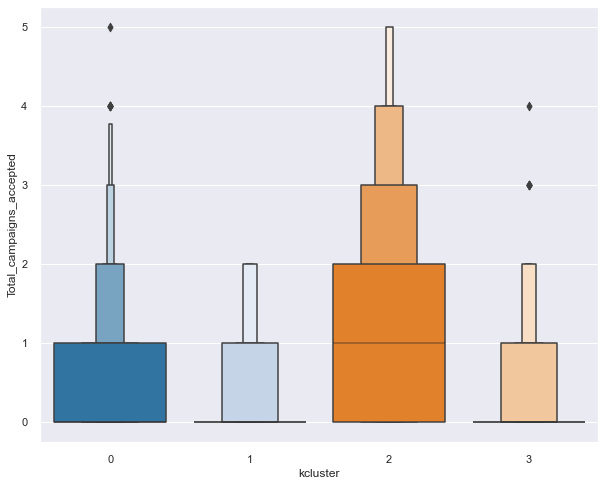

In [211]:
# we plot boxen plot
sns.boxenplot(x=df["kcluster"], y=df["Total_campaigns_accepted"], palette="tab20")
plt.show()

We can clearly see that total number of campaigns accepted is uniform with our best to worst clusters as found above. 

*It seems like customers were grouped similarly and specifically targetted with campaigns by the business in the past prior to our investigation.*

We try to interpret the relationship of Old and New Customers with our clusters.

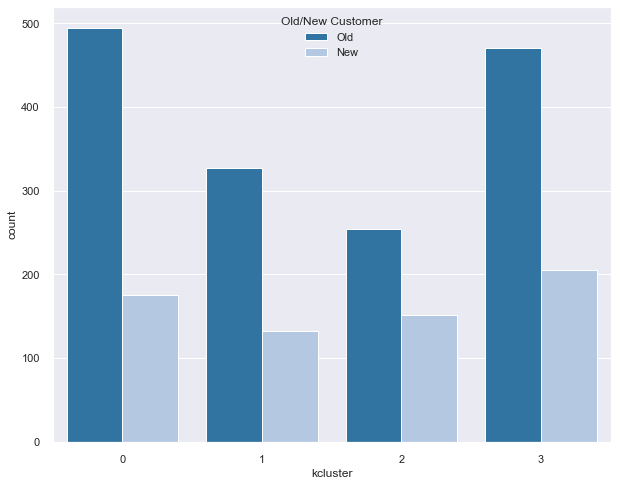

In [213]:
# we plot a countplot
sns.countplot(data=df, x="kcluster", hue="Cust_Seniority", palette="tab20")
plt.legend(title='Old/New Customer', labels=['Old', 'New'])
plt.show()

We can see that:
* Cluster 0 and 3 has a higher ratio of old customers.
* Cluster 2 has a high ratio of newer customers comparatively.

We try to interpret the relationship of living as a couple or alone with our clusters.

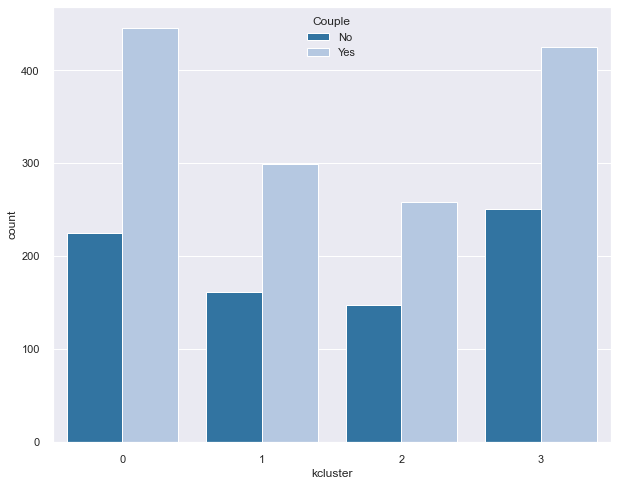

In [216]:
sns.countplot(data=df, x="kcluster", hue="Couple", palette="tab20")
plt.legend(title='Couple', labels=['No', 'Yes'], loc="upper center")
plt.show()

We see that the ratio of couple or not are fairly distributed among all our clusters.

We try to interpret the relationship of number of web visits per month with our clusters.

In [218]:
# we check the descriptive stats
df.groupby("kcluster")['NumWebVisitsMonth'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,4.65,2.00,1.0,3.0,5.0,6.0,9.0
1,460.0,7.08,2.12,0.0,6.0,7.0,8.0,20.0
2,405.0,2.69,1.76,0.0,1.0,2.0,4.0,9.0
3,676.0,6.37,1.61,1.0,5.0,7.0,8.0,10.0


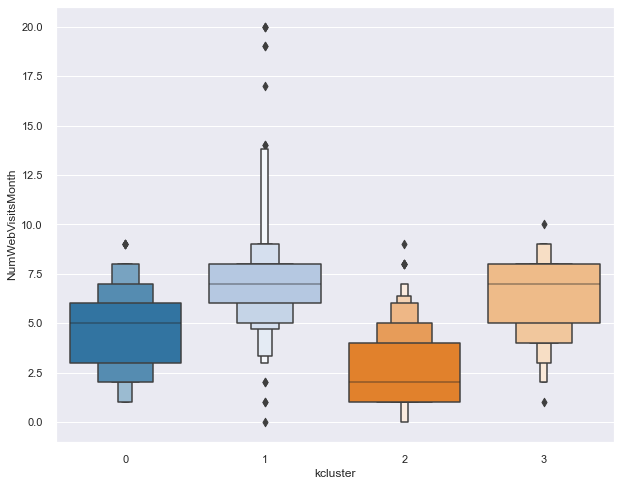

In [219]:
# we plot boxen plot
sns.boxenplot(x=df["kcluster"], y=df["NumWebVisitsMonth"], palette="tab20")
plt.show()

We can see that:
* Cluster 2 on a average has the lowest number of Web visits per month.
* Cluster 1 on an average has the highest number of Web visits per month followed by Cluster 3 and 0.

We try to interpret the relationship of number of purchases made through website with our clusters.

In [220]:
# we check the descriptive stats
df.groupby("kcluster")['NumWebPurchases'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,5.64,2.53,0.0,4.00,5.0,7.0,11.0
1,460.0,1.97,1.92,0.0,1.00,2.0,2.0,25.0
2,405.0,5.26,2.49,0.0,4.00,5.0,6.0,27.0
3,676.0,3.29,2.27,0.0,1.75,3.0,5.0,11.0


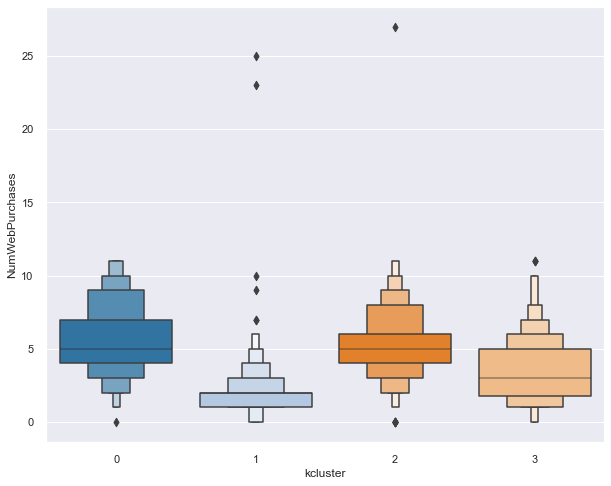

In [221]:
# we plot boxen plot
sns.boxenplot(x=df["kcluster"], y=df["NumWebPurchases"], palette="tab20")
plt.show()

We can see that:
* Cluster 1 on an average has the lowest number of web purchases.
* Cluster 0 on an average has the highest number of web purchases followed by Cluster 2 and 3.

We try to interpret the relationship of number of purchases made directly through store with our clusters.

In [224]:
# we check the descriptive stats
df.groupby("kcluster")['NumStorePurchases'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,7.96,2.87,2.0,6.0,8.0,10.0,13.0
1,460.0,2.91,0.96,0.0,2.0,3.0,3.0,9.0
2,405.0,8.28,2.96,0.0,6.0,8.0,11.0,13.0
3,676.0,4.16,1.96,2.0,3.0,4.0,5.0,13.0


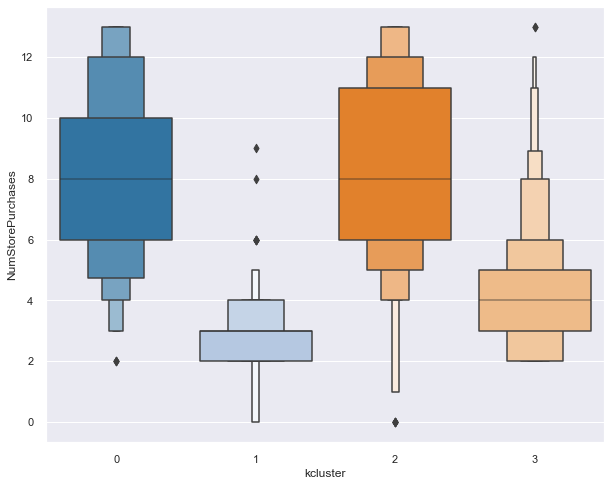

In [225]:
# we plot boxen plot
sns.boxenplot(x=df["kcluster"], y=df["NumStorePurchases"], palette="tab20")
plt.show()

We can see that:
* Cluster 1 on an average has the lowest number of store purchases.
* Cluster 2 on an average has the highest number of store purchases followed by Cluster 0 and 3.

We try to interpret the relationship of number of purchases made through catalogue with our clusters.

In [226]:
# we check the descriptive stats
df.groupby("kcluster")['NumCatalogPurchases'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,671.0,3.74,2.34,0.0,2.0,3.0,5.0,11.0
1,460.0,0.47,1.42,0.0,0.0,0.0,1.0,28.0
2,405.0,6.01,3.05,0.0,4.0,6.0,7.0,28.0
3,676.0,1.12,1.48,0.0,0.0,1.0,1.0,11.0


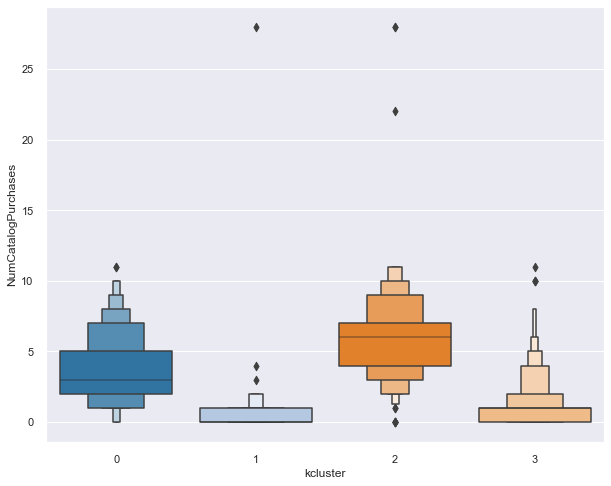

In [227]:
# we plot boxen plot
sns.boxenplot(x=df["kcluster"], y=df["NumCatalogPurchases"], palette="tab20")
plt.show()

We can see that:
* Cluster 1 on an average has the lowest number of catalogue purchases.
* Cluster 2 on an average has the highest number of catalogue purchases followed by Cluster 0 and 3.

#### **Conclusion**

After going through all the infomation above, we can conclude the profiling of customers in the following way:

* **Cluster 0:**
  - Has average income and average spending
  - Likes to buy wines
  - Relatively older
  - Has atleast 1 children
  - More educated
  - Likes to make purchases with discounts
  - Are generally older registered customers
  - Likes to purchase from website

* **Cluster 1:**
  - Has least income and least spending
  - Has shown interest towards gold comparatively
  - Relatively younger
  - Has atleast 1 children
  - Least educated comparatively
  - Visits website very frequently
  - Low number of purchases

* **Cluster 2:**
  - Has highest income and spending
  - Loves to buy meat
  - Spans all ages generally but lacks young customers
  - Has no children mostly
  - Fairly educated
  - Does not make much purchases with discounts
  - Are generally newly registered customers
  - Does not visit website much
  - Loves to purchase from store and catalogue

* **Cluster 3:**
  - Has below average income and spending
  - Likes to buy gold comparatively
  - Relatively middle-aged
  - Has atleast 1 or more than 1 children
  - More educated
  - Are generally older registered customers
  - Visits websites quite frequently

Using the information above, marketing starategies can be formulated to drive business growth.

Data Source: [Link](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

Thank you for reading!! :D

Rishiraj Chowdhury (rishiraj5565@gmail.com)